# Starting with Tensorflow

## Tensors
Tensors sind sie primäre Datennstruktur die TensorFlow nutz um auf dem sogenannten "Computational Graph" zu operieren

In [1]:
import tensorflow as tf

There a two basic datatypes in tensorflow, to comnpute data. Placeholders and variables. While placeholders are just placeholders for the data will be processed , variables are the paramters TensorFlow keeps track, of how to changge these to optimize the algorithm.

In [2]:
#Declaration and initialization of a variable
my_var = tf.Variable(tf.zeros([2,3]))
sess = tf.Session()
initialize_op = tf.global_variables_initializer ()
sess.run(initialize_op)

#Declaration of a placeholder which process matrices of shape(2,2)
x = tf.placeholder(tf.float32, shape=[2,2])

In [3]:
row_dim, col_dim = 10, 10 
#Create zero filles tensor
zero_tsr = tf.zeros([row_dim, col_dim])

#Create one filled tensor
ones_tsr = tf.ones([row_dim, col_dim])

#Creating a tensor with a constant filled
filles_tsr = tf.fill([row_dim, col_dim], 42)

# Creating a tensor out of an existing constant.
constant_tsr = tf.constant([1,2,3])

### Create a nested gate:
f(x) = a * x + b
```
 a --|  
     |-- (multiply)--|  
 x --|               |-- (add) --> output  
                 b --|  
```
             


In [8]:
# Start a New Graph Session
#ops.reset_default_graph()
sess = tf.Session()
# Declaring two Variables. Variables are the parameters the iptimizer can  fine tune
a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))

x_val = 5.
#Declaring a placeholder. Placeholder are there to feed data into the algorithms
x_data = tf.placeholder(dtype=tf.float32)

two_gate = tf.add(tf.multiply(a, x_data), b)

# Declare the loss function as the difference between
# the output and a target value, 50.
loss = tf.square(tf.subtract(two_gate, 50.))

# Initialize variables
init = tf.initialize_all_variables()
sess.run(init)

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
# Run loop across gate
print('\nOptimizing Two Gate Output to 50.')
for i in range(15):
    sess.run(train_step, feed_dict={x_data: x_val})
    a_val, b_val = (sess.run(a), sess.run(b))
    two_gate_output = sess.run(two_gate, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' + ' + str(b_val) + ' = ' + str(two_gate_output))


Optimizing Two Gate Output to 50.
5.4 * 5.0 + 1.88 = 28.88
7.512 * 5.0 + 2.3024 = 39.8624
8.52576 * 5.0 + 2.5051522 = 45.133953
9.012364 * 5.0 + 2.6024733 = 47.664295
9.2459345 * 5.0 + 2.6491873 = 48.87886
9.358048 * 5.0 + 2.67161 = 49.461853
9.411863 * 5.0 + 2.682373 = 49.74169
9.437695 * 5.0 + 2.687539 = 49.87601
9.450093 * 5.0 + 2.690019 = 49.940483
9.456045 * 5.0 + 2.6912093 = 49.971436
9.458901 * 5.0 + 2.6917806 = 49.986286
9.460273 * 5.0 + 2.6920547 = 49.99342
9.460931 * 5.0 + 2.6921864 = 49.99684
9.4612465 * 5.0 + 2.6922495 = 49.99848
9.461398 * 5.0 + 2.6922798 = 49.99927


## Usage of activation functions in tensoflow
<span class="math">$$sidmoid(x) = \frac{1}{1+e^x}$$</span>     


<span class="math">$$ReLU(x) = max(0,x)$$</span>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

In [42]:
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
a2 = tf.Variable(tf.random_uniform(shape=[1,1]))
b1 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2,0.1,500)
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [43]:
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1),b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))

In [44]:
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation,0.75)))
ops.reset_default_graph()

NameError: name 'ops' is not defined

In [45]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
init = tf.initialize_all_variables()
sess.run(init)

In [46]:
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
for i in range(750):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation,feed_dict={x_data: x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))

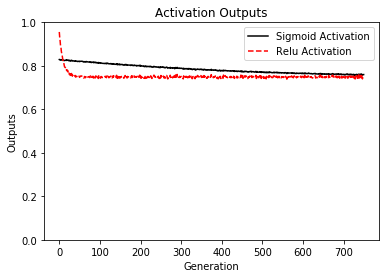

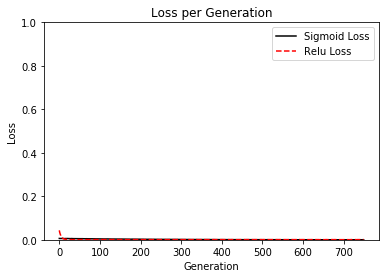

In [47]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

| Activation Fuunction 	|      Advantages      	|          Disadvantages         	|
|:--------------------:	|:--------------------:	|:------------------------------:	|
|        Sigmoid       	| less extreme outputs 	|       slower convergence       	|
|         ReLu         	|   Fast convergence   	| extreme output values possible 	|